<h1><center>Metrics for predicting the probability of an observation belonging to a class</center></h1>

<h2 style="color:purple"><center>Confusion Matrix</center></h2>

https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

https://www.kaggle.com/jprakashds/confusion-matrix-in-python-binary-class

## *Written by Nathanael Hitch*

<hr>

A *Confusion Matrix* is a performance measurement for machine learning (ML) classification problems; it is a combination table, with the number of combinations dependenton the number of classes in the classification problem. It is extremely useful for measuring Recall, Precision, Specificity, Accuracy and most importantly ROC-AUC Curve (later).

There are 4 classifications for the ML's predictions. **Remember** predicted values are described as Positive/Negative, while actual values are described as True/False:

1. True Positive<br>
Predicted = Positive, Actual = True

2. False Positive<br>
Predicted = Positive, Actual = False

3. True Negative<br>
Predicted = Negative, Actual = False

4. False Negative<br>
Predicted = Negative, Actual = True

<img src="Images\Basic_CM.png" align="left">

We can analyse the matrix through other metrics:

- Recall:<br>
Out of the total positive classes, how much did we predicted correctly.

- Precision:<br>
Out of the total positive classes predicted correctly, how many are actually positive.

- Accuracy:<br>
Out of all the classes, how much did we predicted correctly.

- F-Score:<br>
It can be difficult to compare two models with low precision and high recall, or vice versa. F-score helps to measure Recall and Precision at the same time (using Harmonic Mean in place of Arithmetic Mean by punishing the extreme values more).

<img src="Images\F-Score.png" align="left">

# Example 1: Binary Classification

The code for getting a **Confusion Matrix** from a data set is very straightforward, as the work is done by the *sklean* module *metrics.confusion_matrix()*.

In [1]:
from sklearn.metrics import confusion_matrix

expected = [1,1,0,1,0,0,1,0,0,0]

predicted = [1,0,0,1,0,0,1,1,1,0]

cm = confusion_matrix(expected, predicted)

print(cm)

[[4 2]
 [1 3]]


There are:
- 3 True Positives
- 2 False Positives
- 1 False Negative
- 4 True Negatives

The matrix is shown the opposite to what's would probably be expected (shown above).

The labels tab is useful to organise what way round you want the confusion matrix:

In [2]:
cm = confusion_matrix(expected, predicted, labels = [1, 0])

print(cm)

[[3 1]
 [2 4]]


Can do a similar one for written labels:

In [3]:
expected = ["Cat","Cat","Dog","Cat","Dog","Dog","Cat","Dog","Dog","Dog"]

predicted = ["Cat","Dog","Dog","Cat","Dog","Dog","Cat","Cat","Cat","Dog"]

labels=["Cat", "Dog"]

cm = confusion_matrix(expected, predicted, labels = labels)

print(cm)

[[3 1]
 [2 4]]


You can import pandas to use the **crosstab()** function to get a matrix with some labels on it.

In [4]:
import pandas as pd

exp_series = pd.Series(expected)

pred_series = pd.Series(predicted)

pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,Cat,Dog,All
Actual,,,
Cat,3,1,4
Dog,2,4,6
All,5,5,10


Matlab can be usd to show the confusion matrix in a bolder (and better) way:

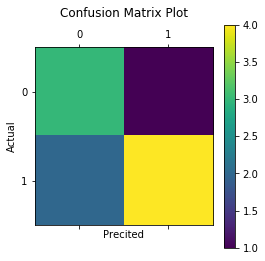

In [5]:
import matplotlib.pyplot as plt

plt.matshow(cm)
# Show Confusion Matrix

plt.title('Confusion Matrix Plot\n')
# Title

plt.colorbar()
# Colourbar

plt.xlabel('Precited')
# X label

plt.ylabel('Actual')
# Y label

plt.show()
# Show figure

The labels (0, 1) are still the opposite way round than we'd expect.

Using a few more matlab tricks we can get the matrix around the way it should be.

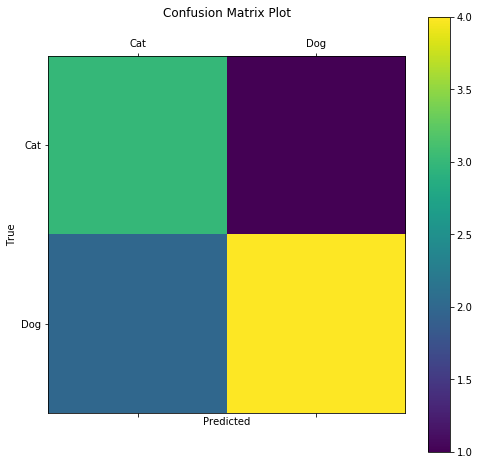

In [6]:
fig = plt.figure(figsize=[8,8])
# Resize figure

ax = fig.add_subplot(111)
cax = ax.matshow(cm)

plt.title('Confusion Matrix Plot\n')

fig.colorbar(cax)
# Colourbar based on the confusion matrix

ax.set_xticklabels([''] + labels)
# X labels using the 'labels' list

ax.set_yticklabels([''] + labels)
# Y labels using the 'labels' list

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Lastly, what would be useful is to have the data for each *value set* in the matlab confusion matrix:

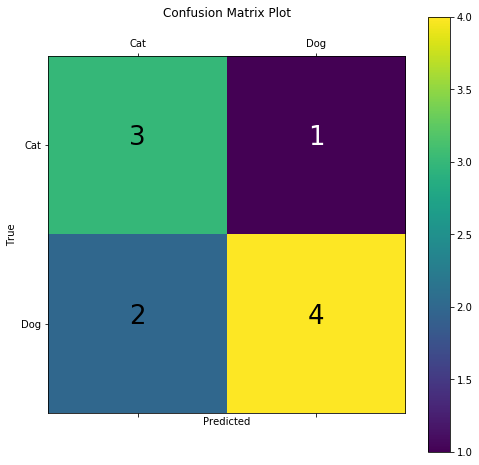

"\nplt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')\nplt.colorbar()\nplt.title('Confusion Matrix without Normalization')\nplt.xlabel('Predicted')\nplt.ylabel('Actual')\ntick_marks = np.arange(len(set(expected))) # length of classes\nclass_labels = ['0','1']\n\nplt.xticks(tick_marks,class_labels)\nplt.yticks(tick_marks,class_labels)\n# plotting text value inside cells\nthresh = cf.max() / 2.\nfor i,j in itertools.product(range(cf.shape[0]),range(cf.shape[1])):\n    plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')\nplt.show()\n"

In [7]:
import itertools

fig = plt.figure(figsize=[8,8])
# Resize figure

ax = fig.add_subplot(111)
cax = ax.matshow(cm)

plt.title('Confusion Matrix Plot\n')

fig.colorbar(cax)
# Colourbar based on the confusion matrix

ax.set_xticklabels([''] + labels)
# X labels using the 'labels' list

ax.set_yticklabels([''] + labels)
# Y labels using the 'labels' list

plt.xlabel('Predicted')
plt.ylabel('True')

thresh = cm.max() / 2
# Finding the maximum value, hence the max the colour will go to on the colour bar
    # and dividing it by 2 to determine the threshold over which the font's colour
    # will change

for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],'d'),horizontalalignment='center',color='white' if cm[i,j] < thresh else 'black', fontsize = 26)

plt.show()

# Below code from website: kaggle.com
"""
plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix without Normalization')
plt.xlabel('Predicted')
plt.ylabel('Actual')
tick_marks = np.arange(len(set(expected))) # length of classes
class_labels = ['0','1']

plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cf.max() / 2.
for i,j in itertools.product(range(cf.shape[0]),range(cf.shape[1])):
    plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
plt.show()
"""

# Example 2: Multi-class Logistic Regression model

The code is pretty much the same for the multi-class example, except that the labels for the confusion matrix and pretty much compulsory.

## Imports

In [8]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
import string
from spacy.lang.en.stop_words import STOP_WORDS
import nltk
import re
from sklearn.multiclass import OneVsRestClassifier

from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt
import itertools
from itertools import cycle
from scipy import interp

import requests
import io

## Initialise Logistic Regression (OvR) Model

In [9]:
                        # Reading .csv file

# Training csv file
url_train = "https://raw.githubusercontent.com/SoniaLei/nlp-web-scrapping/development/data/raw/tweets-train.csv"
csv_train = requests.get(url_train).content
df_train = pd.read_csv(io.StringIO(csv_train.decode('utf-8')))

# Testing csv file
url_test = "https://raw.githubusercontent.com/SoniaLei/nlp-web-scrapping/development/data/raw/tweets-test.csv"
csv_test = requests.get(url_test).content
df_test = pd.read_csv(io.StringIO(csv_test.decode('utf-8')))

X_train = df_train['text'].astype(str)
Y_train = df_train['sentiment'].astype(str)

X_test = df_test['text'].astype(str)
Y_test = df_test['sentiment'].astype(str)

#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

                        # Creating custom cleaner function

Lemmatiser = nltk.stem.WordNetLemmatizer()
# Instantiating the NLTK Lemmatiser

punctuations = string.punctuation
# Putting punctuation symbols into an object

stopwords = STOP_WORDS
# A list of stopwords that can be filtered out
    # NLTK also has a stop words object but it has fewer words

def text_cleaner(sentence):    
                
    sentence = "".join([char for char in sentence.strip() if char not in punctuations])
    # Getting rid of any punctuation characters
    
    myTokens = re.split('\W+', sentence)
    # Tokenising the words
    
    myTokens = [token.lower() for token in myTokens if token not in stopwords]
    # Removing stop words
    
    myTokens = [Lemmatiser.lemmatize(token) for token in myTokens]
    # Lemmatising the words and putting in lower case except for proper nouns
    
    return myTokens 

#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

                        # Creating Bag-of-Words Vectoriser

bow_vector = CountVectorizer(tokenizer = text_cleaner, ngram_range=(1,1))

#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

                        # Building OVR Logisitic Regression Classifier

LogReg = LogisticRegression(max_iter=1000)

ovr = OneVsRestClassifier(LogReg)

pipe = Pipeline([('vectorizer', bow_vector)
                 ,('classifier', ovr)])

pipe.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function text...at 0x00000137E9461318>,
                                 vocabulary=None)),
                ('classifier',
                 OneVsRestClassifier(estimator=LogisticRegression(C=1.0,
                                                                  class_weight=None,
                                                                  dual=F

## Confusion Matrix

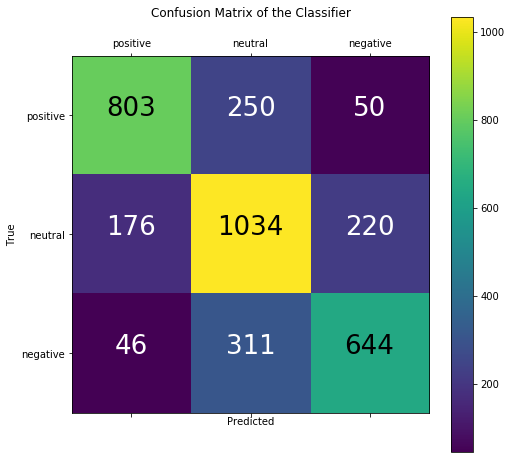

[[ 803  250   50]
 [ 176 1034  220]
 [  46  311  644]]


In [10]:
predicted = pipe.predict(X_test)

labels = ["positive","neutral","negative"]

cm = metrics.confusion_matrix(Y_test, predicted, labels)

fig = plt.figure(figsize=[8,8])

ax = fig.add_subplot(111)
cax = ax.matshow(cm)

plt.title('Confusion Matrix of the Classifier\n')
fig.colorbar(cax)

ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)

plt.xlabel('Predicted')
plt.ylabel('True')

thresh = cm.max() / 2

for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],'d'),horizontalalignment='center',color='white' if cm[i,j] < thresh else 'black', fontsize = 26)

plt.show()
print(cm)

<h2 style="color:purple"><center>ROC & AUC</center></h2>

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

## *Written by Nathanael Hitch*

# Predicting Probabilities

Rather than predicting the class values of a model directly, it can be more flexible to predict the probabilities for each class instead. This is to provide the capability to choose and even calibrate the threshold for how to interpret the predicted probabilities.

For example, a default might be to use a threshold of 0.5, meaning that a probability from 0.0 - 0.49 is a negative outcome and a probability from 0.5 - 1.0 is a positive outcome. This threshold can be adjusted to tune the behavior of the model for a specific problem.<br>
An example would be to reduce more of one or another type of error.

For a binary classification problem, there are two types of errors:

- False Positive: predict an event when there was no event.
- False Negative: predict no event when in fact there was an event.

By predicting probabilities and calibrating a threshold, a balance of between these two errors can be found.

E.g. A smog prediction system: it may be better for the system to be more concerned with having low false negatives than low false positives. A false negative would mean not warning about a smog day when it is a high smog day, leading to health issues in the public that are unable to take precautions. A false positive means the public would take precautionary measures when they didn’t need to.

## ROC Curve + AUC

An important evaluation metric when predicting the probability of a binary outcome is the **Receiver Operating Characteristic**, or ROC, curve. It is a plot of the *false positive rate* (x-axis) against the *true positive rate* (y-axis) for a number of different candidate threshold values between 0.0 and 1.0.<br>

<img src="Images\ROC_Curve.png" style="width:1000px">

- **True Positive Rate (TPR)**: the number of true positives divided by the sum of the true positives and the false negatives (total number of actual positives).<br>
Shows how good the model is at predicting the positive class when the actual outcome is positive; also referred to as sensitivity.

- **False Positive Rate (FPR)**: the number of false positives divided by the sum of the false positives and the true negatives (total number of actual negatives).<br>
It summarizes how often a positive class is predicted when the actual outcome is negative; also called the false alarm rate

The false positive rate is also referred to as the inverted specificity ($1 - specificity$).

- Specificity: the total number of true negatives divided by the sum of the true negatives and false positives (total number of actual negatives).

The ROC curve is a useful for a few reasons:

- The curves of different models can be compared directly in general or for different thresholds.
- The **Area Under the Curve** (AUC) can be used as a summary of the model skill.

The AUC represents the degree or measure of separability; it tells how much the model is capable of distinguishing between classes. The higher the AUC, the better the model is at predicting *True Positives* and *True Negatives*. - https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

The shape of the curve contains a lot of information: what we might care about most for a problem, the expected false positive rate, and the false negative rate. Simply put:

- Smaller values on the x-axis of the plot indicate lower false positives and higher true negatives (**Good**).
- Larger values on the y-axis of the plot indicate higher true positives and lower false negatives (**also Good**).

Better models will assign, on average, a higher probability to a randomly chosen real positive occurrence than a negative occurrence, making the model better. These models are represented by curves that bow up to the top left of the plot.

Worse models can't discriminate between the classes and would predict a random class or a constant class in all cases. A model with no skill at each threshold is represented by a diagonal line from the bottom left of the plot to the top right and has an AUC of 0.5.

A model with perfect skill is represented at a point (0,1). A model with perfect skill is represented by a line that goes from the bottom left of the plot to the top left and then across the top to the top right.

An operator may plot the ROC curve for the final model and choose a threshold that gives a desirable balance between the false positives and false negatives.

# Code - ROC Curves and AUC in Python

To plot a ROC curve, use the roc_curve() scikit-learn function.<br>
The function takes both the true outcomes (0,1) from the test set and the predicted probabilities for the 1 class. The function returns the false positive rates for each threshold, true positive rates for each threshold and thresholds.

The AUC, for the ROC, can be calculated using the roc_auc_score() function.<br>
Like the roc_curve() function, the AUC function takes both the true outcomes (0,1) from the test set and the predicted probabilities for the 1 class. It returns the AUC score between 0.0 and 1.0 for no skill and perfect skill respectively.

In [11]:
""" Error if run """

fpr, tpr, thresholds = roc_curve(y, probs)
# calculate roc curve
    # y = actual results from the testing set
    # probs = a no skill prediction

# calculate AUC
auc = roc_auc_score(y, probs)
print('AUC: %.3f' % auc)

NameError: name 'y' is not defined

# Binary-class Example

For this example, a Logistic Regression model will be used. The intial set up:

In [12]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# generate 2 class dataset

#trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.5, random_state=2)
# split into train/test sets

model = LogisticRegression()
model.fit(X_train, Y_train)
# fit a model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### ROC Curve

To calculate the ROC curve, predictions and probabilities need to be calculated:

<hr>

<span style="background-color:red; color:white">UNSURE</span>

https://www.datascienceblog.net/post/machine-learning/interpreting-roc-curves-auc/

**No Skill Prediction**: n_score<br>
This is to draw the line to show the cutoff point for differentiating the positive to the negative class.

**Positive Probability**: y_score<br>
As the curve is dependent on True and False positive rates, this probability of how probable this class, which is known to be positive, is to be being positive. Some are classified as positives, *true positives (TPs)*, some are classed as negative, *false negative (FPs)*.

Correct predictions of the positive class (TPs) lead to increases in the TPR, while incorrect predictions (FPs) lead to an increase in the FPR.<br>
E.g. the TPR first rises to 25% at an FPR of 0% (estimate with $y^i =3.5$ is correctly predicted and there are no false positives) but then for an increase of 50% for TPR incurs an FPR of 9% as some FPs start to 'slip into' the false negatives.

The predictive performance of a classifier can be quantified in terms of the are under the ROC curve (AUC), which lies in the range of 0 - 1.

<img src="Images/roc-plot.gif" width="750px" align=left>

<span style="background-color:red; color:white">UNSURE</span>

<hr>

In [13]:
n_score = [0 for _ in range(len(Y_test))]
# generate a no skill prediction (majority class)
    # Calculate the line that, below it, shows a bad model/classifier

y_score = model.predict_proba(X_test)
# predict probabilities
    # Predict probabilities of a positive or negative outcome

# keep probabilities for the positive outcome only
y_score_pos = y_score[:, 1]

Using these probablities, the scores for the ROC curve and AUC can be attained and the ROC curve can be calculated:

In [14]:
# calculate scores
ns_auc = roc_auc_score(Y_test, n_score)
lr_auc = roc_auc_score(Y_test, y_score_pos)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, n_score)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, y_score_pos)

The curve can then be plotted:

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903


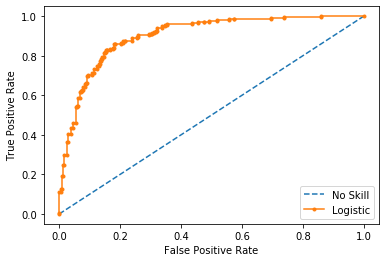

In [15]:
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

# Multi-class example - Logistic Regression

ROC curves are typically used in binary classification to study the output of a classifier. In order to extend ROC curve and AUC to a multi-class dataset, it is necessary to binarize the output (**more on that below**). On a ROC graph, plots can include:

- One ROC curve can be drawn per label
- One overall ROC curve can be drawn by considering each element of the label indicator matrix as a binary prediction, **micro-averaging**.
- Another evaluation measure for multi-label classification is **macro-averaging**, which gives equal weight to the classification of each label.

Using the NLP dataset, we can set up the dataframe, vectoriser and classifier. However, the set up code includes the binarisation code to transform the data. There are quite a few different binary models involved as the code uses an One-vs-All (OVR) classifier with the Logistic Regression. This gives:

- Postive vs [Neutral and Negative]
- Neutral vs [Positive and Negative]
- Negative vs [Positive and Neutral]

<hr>

<center><span style="color:white; background-color:red; font-size:20px">decision_function() vs predict_proba()</span></center>

In the original of the example below, the *decision_function()* was used. However, the previous binary-example used the *predict_proba()* function; the multi-class example for the Random Forest Regressor, later on, HAS to use *predict_proba()* function as the Random Forest doesn't have the *decision_function()*.

Using the *predict_proba()* function below came back with the same results as the *decision_function()* for each curve.<br>
To keep consistency, I have used the *predict_proba()* function in this example. Bear in my mind that *decision_function()* can be used here, in the same way, and in most other examples will probably be used.

<center><span style="color:white; background-color:red; font-size:20px">Binarisation</span></center>

For the Random Forest Regressor model, later on, binarising the *Y_train* data makes the roc calculations fail, for reasons I'm not sure of. Binarising the *Y_test* data IS still needed.

In the original of the example below, *Y_train* data WAS binarised. The same results came back whether *Y_train* was binarised or not. Again, for consistency, *Y_train* won't be binarised, with the code commented out. In most similar examples the *Y_train* will be binarised, so remember that.

<hr>

Setting up the example using the **NLP Project** data:

In [16]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import label_binarize
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import nltk
import re
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, auc
import matplotlib.pyplot as plt
from itertools import cycle

import requests
import io

#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

                        # Reading .csv file

# Training csv file
url_train = "https://raw.githubusercontent.com/SoniaLei/nlp-web-scrapping/development/data/raw/tweets-train.csv"
csv_train = requests.get(url_train).content
df_train = pd.read_csv(io.StringIO(csv_train.decode('utf-8')))

# Testing csv file
url_test = "https://raw.githubusercontent.com/SoniaLei/nlp-web-scrapping/development/data/raw/tweets-test.csv"
csv_test = requests.get(url_test).content
df_test = pd.read_csv(io.StringIO(csv_test.decode('utf-8')))

X_train = df_train['text'].astype(str)
Y_train = df_train['sentiment'].astype(str)

X_test = df_test['text'].astype(str)
Y_test = df_test['sentiment'].astype(str)

############################################## Binarize the output ##############################################
#Y_train = label_binarize(Y_train, classes=['negative', 'neutral', 'positive'])
    # Commented out

Y_test = label_binarize(Y_test, classes=['negative', 'neutral', 'positive'])
#################################################################################################################

n_classes = Y_test.shape[1]
# The number of classes in the dataframe

#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

                        # Creating custom cleaner function

Lemmatiser = nltk.stem.WordNetLemmatizer()
# Instantiating the NLTK Lemmatiser

punctuations = string.punctuation
# Putting punctuation symbols into an object

nlp = spacy.load("en_core_web_sm")
# Import spacy model

stopwords = spacy.lang.en.stop_words.STOP_WORDS
# A list of stopwords that can be filtered out
    # NLTK also has a stop words object but it has fewer words

def text_cleaner(sentence):    
                
    sentence = "".join([char for char in sentence.strip() if char not in punctuations])
    # Getting rid of any punctuation characters
    
    myTokens = re.split('\W+', sentence)
    # Tokenising the words
    
    myTokens = [token.lower() for token in myTokens if token not in stopwords]
    # Removing stop words
    
    myTokens = [Lemmatiser.lemmatize(token) for token in myTokens]
    # Lemmatising the words and putting in lower case except for proper nouns
    
    return myTokens 

#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

                        # Creating Bag-of-Words Vectoriser

tfidf_vector = TfidfVectorizer(tokenizer = text_cleaner)

#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

                        # Building OVR Logisitic Regression Classifier

LogReg = LogisticRegression(max_iter=1000)

ovr = OneVsRestClassifier(LogReg)

pipe = Pipeline([('vectorizer', tfidf_vector)
                 ,('classifier', ovr)])

pipe.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...
                                 tokenizer=<function text_cleaner at 0x00000137F2979B88>,
                                 use_idf=True, vocabulary=None)),
                ('classifier',
                 OneVsRestClassifier(estimator=LogisticRegression(C=1.0,
                                          

The predictions for the ROC need to calculated; same concept as the binary classification with slightly different syntax:

In [17]:
# Learn to predict each class against the other

########## decision_function() #########################
y_score_df = pipe.decision_function(X_test)

print("Decision_function:\n",y_score_df)
print("\nLength:", len(y_score_df))

########## predict_proba() #############################

y_score = pipe.predict_proba(X_test)

print("\nPredict_proba:\n",y_score)
print("\nLength:", len(y_score))

""" We will be using the predict_proba() function """

Decision_function:
 [[-1.62933318 -0.1484989  -0.69894691]
 [-2.33617143 -1.52587091  1.29220933]
 [ 0.37793515  0.11439402 -3.23930368]
 ...
 [-0.15951284 -0.17131251 -2.16372166]
 [-3.47557685 -0.82391877  0.86390863]
 [-2.2320961  -0.61639457  0.11211541]]

Length: 3534

Predict_proba:
 [[0.17094575 0.48278039 0.34627386]
 [0.0838695  0.16988509 0.74624541]
 [0.51168212 0.45579688 0.032521  ]
 ...
 [0.45094447 0.44807361 0.10098193]
 [0.02890455 0.29364919 0.67744626]
 [0.09933819 0.35940499 0.54125682]]

Length: 3534


' We will be using the predict_proba() function '

<span style="background-color:red; color:white">They directly output different results but give the same ROC curves and AUC results - Unsure why</span>

<hr>

We then need to calculate the ROC and AUC for each curve.

To see the ROC curve and AUC calculation for each binary classification from the OVR model, the code uses the same *roc_curve* and *roc_auc* functions as the binary classification but loops through all the ROC and AUC results:

In [18]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

Lastly, the ROC curve needs to be plotted:

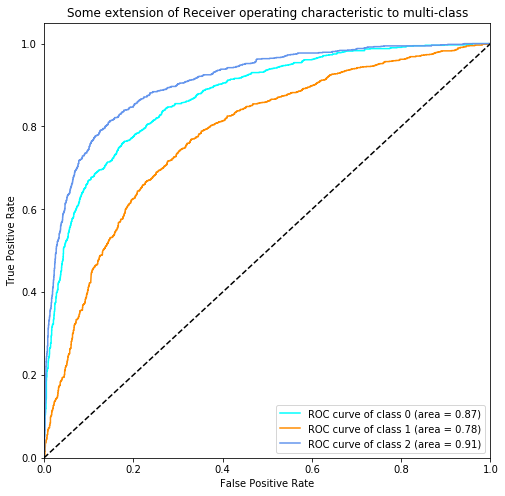

In [19]:
# Plot of a ROC curve for a specific class

plt.figure(figsize=[8,8])

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

<hr>

**decision_function()**<br>
0 = 0.87
1 = 0.77
2 = 0.91

<hr>

In addition the code below has calculated the *micro* and *macro* averaging:

- **Micro**: a ROC curve that considers each element of the label indicator matrix as a binary prediction.

- **Macro**: a ROC curve that gives equal weight to the classification of each label.

As there are multiple binary models due to the 3 different sentiments hence the code needs to loop through each one to get the ROC and AUC results:

In [20]:
from scipy import interp

########## Micro #########################

fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Compute micro-average ROC curve and ROC area

########## Macro #########################

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

C:\Users\nathi_000\anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


And then plot them:

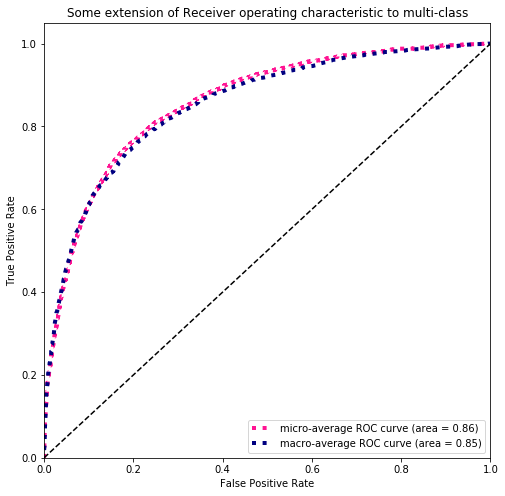

In [21]:
# Plot all ROC curves
plt.figure(figsize=[8,8])
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
         
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

<hr>

**decision_function**<br>
micro = 0.86
macro = 0.85

<hr>

Combing the ROC curves of each binary classification and the micro and macro averaging:

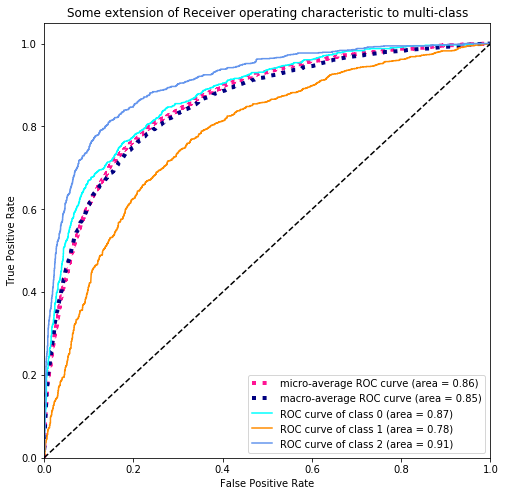

In [22]:
# Plot all ROC curves
plt.figure(figsize=[8,8])
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
         
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Multi-class Example - Random Forest

As mentioned, decision tree models, like Random Forest, don't have the **decision_function()** hence the need to use the **predict_proba()** function.

**Note:** binarising the *Y_train* makes the roc calculations fail for reasons I'm not yet sure of.

Setting up the Random Forest Regressor with the **NLP Project** data:

In [23]:
import spacy
import pandas as pd
import re
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import string
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import nltk
from sklearn.pipeline import Pipeline

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, auc
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.preprocessing import label_binarize

import requests
import io


#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

                        # Reading .csv file

# Training csv file
url_train = "https://raw.githubusercontent.com/SoniaLei/nlp-web-scrapping/development/data/raw/tweets-train.csv"
csv_train = requests.get(url_train).content
df_train = pd.read_csv(io.StringIO(csv_train.decode('utf-8')))

# Testing csv file
url_test = "https://raw.githubusercontent.com/SoniaLei/nlp-web-scrapping/development/data/raw/tweets-test.csv"
csv_test = requests.get(url_test).content
df_test = pd.read_csv(io.StringIO(csv_test.decode('utf-8')))

X_train = df_train['text'].astype(str)
y_train = df_train['sentiment'].astype(str)

sentiments = ['negative', 'neutral', 'positive']

# Binarize the output
#y_train = label_binarize(y_train, classes=sentiments)

X_test = df_test['text'].astype(str)
y_test = df_test['sentiment'].astype(str)

# Binarize the output
y_test = label_binarize(y_test, classes=sentiments)

#n_classes = y_train.shape[1]
n_classes = y_test.shape[1]

#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

                        # Creating custom tokeniser and cleaning function

Lemmatiser = nltk.stem.WordNetLemmatizer()
# Instantiating the NLTK Lemmatiser

punctuations = string.punctuation
# Putting punctuation symbols into an object

nlp = spacy.load("en_core_web_sm")
# Import spacy model

stopwords = spacy.lang.en.stop_words.STOP_WORDS
# A list of stopwords that can be filtered out
    # NLTK also has a stop words object but it has fewer words

def text_cleaner(sentence):    
                
    sentence = "".join([char for char in sentence.strip() if char not in punctuations])
    # Getting rid of any punctuation characters
    
    myTokens = re.split('\W+', sentence)
    # Tokenising the words
    
    myTokens = [token.lower() for token in myTokens if token not in stopwords]
    # Removing stop words
    
    myTokens = [Lemmatiser.lemmatize(token) for token in myTokens]
    # Lemmatising the words and putting in lower case except for proper nouns
    
    return myTokens    

#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

                        # Creating Vectoriser and Classifiers

tfidf_vector = TfidfVectorizer(tokenizer = text_cleaner)

rfc = RandomForestClassifier(n_estimators = 10,n_jobs=-1)

pipe = Pipeline([('vectorizer', tfidf_vector)
                 ,('classifier', rfc)])

pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

Then calculating each curve and micro and macro curves:

C:\Users\nathi_000\anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


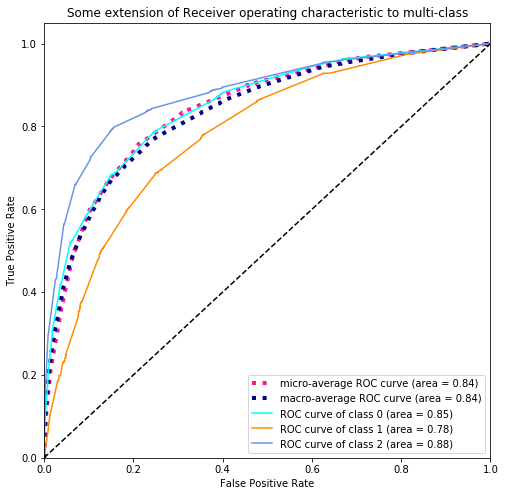

In [24]:
y_score = pipe.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=[8,8])
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()